In [ ]:
### ORLANDO ALFONSO BENAVIDES PEREZ
### ELECTIVA 3 
### ENTREGA FINAL

In [6]:
#Se importan las librerias necesarias
import matplotlib.pyplot as plt
import boto3
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
# Se descargan los datos desde el bucker de S3
s3_resource = boto3.resource('s3')
s3_client = boto3.client('s3')
bucket_name = 'dolar-prices724'
my_Bucket = s3_resource.Bucket(bucket_name)
folder_name = 'data'

for obj in my_Bucket.objects.all():
    print(my_Bucket)
    s3_client.download_file(bucket_name, obj.key, f'{folder_name}/{obj.key}')

s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')
s3.Bucket(name='dolar-prices724')


In [13]:
# Se leen los archivos de datos para extraer el valor final y crean un dataframe
data_dollar = []

for filename in os.listdir(folder_name):
    file_path = (os.path.join(folder_name, filename))
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path, usecols=['fecha', 'valor'], parse_dates=['fecha'])
        data_dollar.append(df)

df_dollar_price = pd.concat(data_dollar).reset_index(drop=True)

In [14]:
# Se transforma el dataset para dejar un registro por cada 10min.
df_dollar_price.set_index('fecha', inplace=True)
df_dollar_10min = df_dollar_price.resample("10Min").mean()
df_dollar_10min.reset_index(inplace=True)

In [15]:
df_dollar_10min

,fecha,valor
0,2023-02-17 13:10:00,4946.820200
1,2023-02-17 13:20:00,4942.746043
2,2023-02-17 13:30:00,4937.931349
3,2023-02-17 13:40:00,4933.719010
4,2023-02-17 13:50:00,4931.068076
...,...,...
5496,2023-03-27 17:10:00,4687.065918
5497,2023-03-27 17:20:00,4687.071218
5498,2023-03-27 17:30:00,4687.094721
5499,2023-03-27 17:40:00,4687.120247


In [16]:
# Se renombran columnas
df_dollar_10min = df_dollar_10min.rename(columns={'valor':'precio'})

In [17]:
# Se eliminan nulos
df_dollar_10min = df_dollar_10min.dropna()

In [18]:
# Se eliminoan duplicados
df_dollar_10min = df_dollar_10min.drop_duplicates()

In [19]:
# Se ordeno por fechas
df_dollar_10min = df_dollar_10min.sort_values(by='fecha')
df_dollar_10min = df_dollar_10min.reset_index(drop=True)

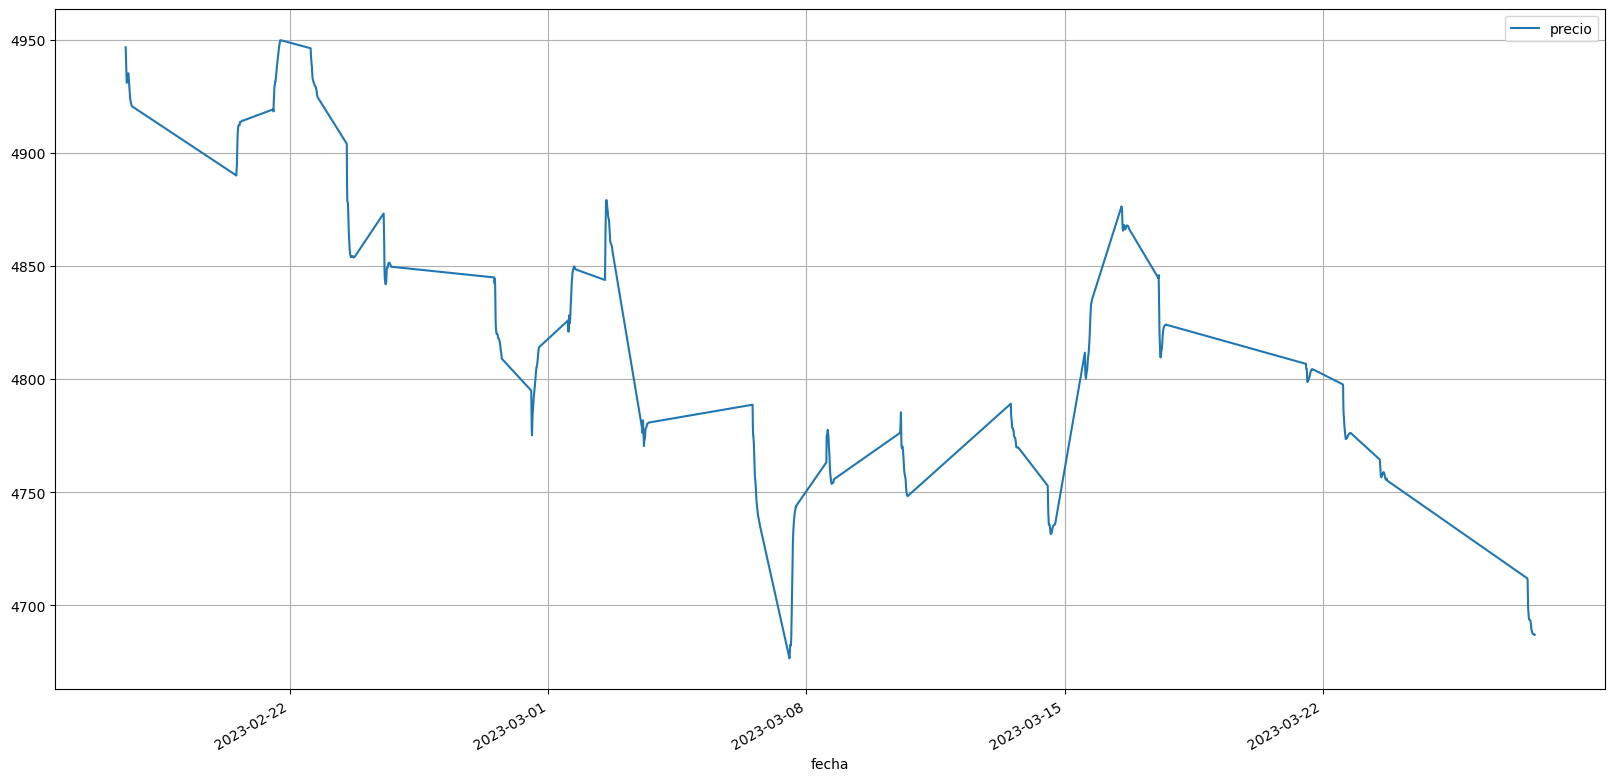

In [20]:
# Se imprime la gráfica
df_dollar_10min.plot(x='fecha', y=['precio'], figsize=(20,10))
plt.grid()


In [37]:
# Se muestra el dataframe
df_dollar_10min.tail

<bound method NDFrame.tail of                   fecha       precio
0   2023-02-17 13:10:00  4946.820200
1   2023-02-17 13:20:00  4942.746043
2   2023-02-17 13:30:00  4937.931349
3   2023-02-17 13:40:00  4933.719010
4   2023-02-17 13:50:00  4931.068076
..                  ...          ...
709 2023-03-27 17:10:00  4687.065918
710 2023-03-27 17:20:00  4687.071218
711 2023-03-27 17:30:00  4687.094721
712 2023-03-27 17:40:00  4687.120247
713 2023-03-27 17:50:00  4686.972830

[714 rows x 2 columns]>

In [23]:
# Se guarda el dataset procesado
df_dollar_10min.to_csv('df_dollar_10min.csv', index=False)

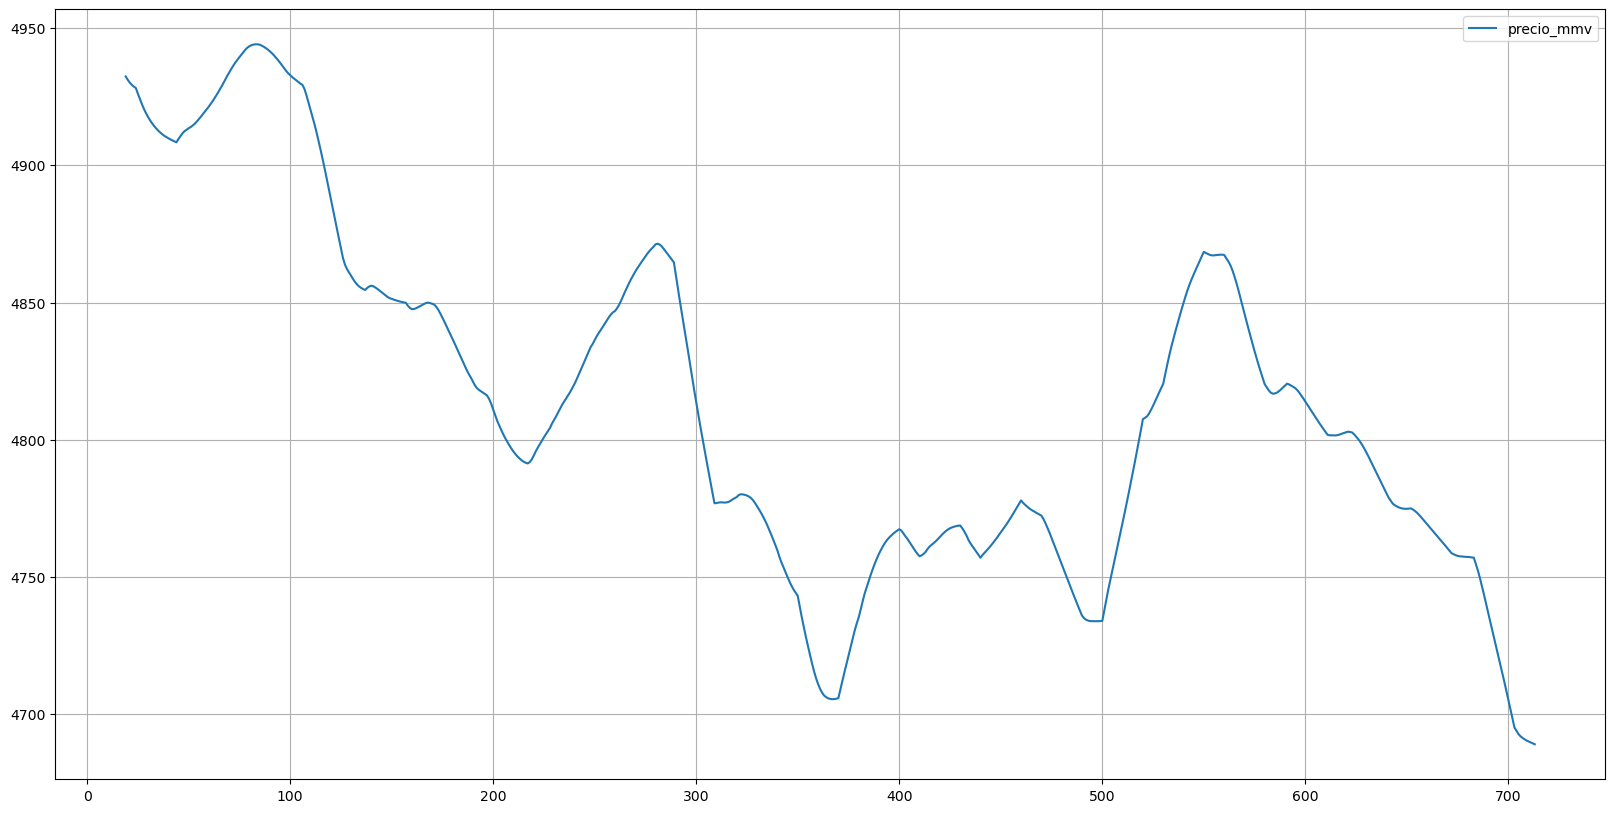

In [41]:
# Se muestra la Media movil
df_mmv = pd.DataFrame({'fecha':df_dollar_10min['fecha']})
df_mmv['precio_mmv'] = df_dollar_10min['precio'].rolling(window=20).mean()
df_mmv.plot(y=['precio_mmv'], figsize=(20,10)).grid()

In [29]:
#Análisis de los datos
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [30]:
df_test_adfuller = sm.tsa.stattools.adfuller(df_dollar_10min['precio'], autolag='AIC')
result = pd.Series(df_test_adfuller[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_adfuller[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                  -1.429835
p-value                          0.567892
#Lags Used                       1.000000
Number of Observations Used    712.000000
Critical Value (1%)             -3.439568
Critical Value (5%)             -2.865608
Critical Value (10%)            -2.568936
dtype: float64


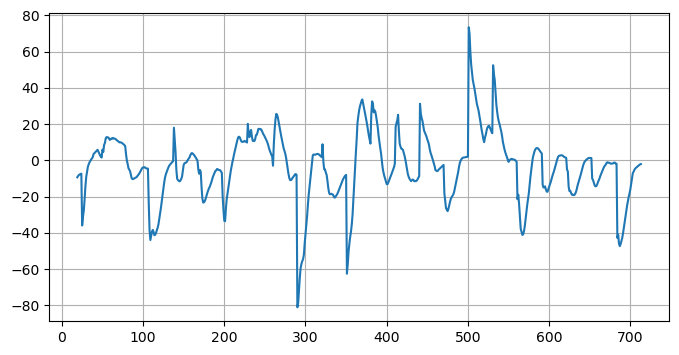

In [31]:
# Serie es no estacionaria, transformarción a estacionaria usando el metodo de resta de la media movil
mmv_diff = df_dollar_10min['precio']-df_mmv['precio_mmv']
plt.figure(figsize=(8,4))
plt.plot(mmv_diff, label='Diferencia entre precio y media movil')
plt.grid()
plt.show()
mmv_diff.dropna(inplace=True)

In [32]:
#Modelo de series de tiempo
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [33]:
df_for_prediction = df_dollar_10min.copy()
df_for_prediction.set_index('fecha', inplace=True)

In [34]:
train_size = math.ceil(len(df_for_prediction) * 0.8)
train_data = df_for_prediction.values[:train_size]
test_data = df_for_prediction.values[train_size:]

In [35]:
X = df_for_prediction.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/statespace/tools.py:538: RuntimeWarning: invalid value encountered in true_divide
  x = r / ((1 - r**2)**0.5)


Test MSE: 39.194


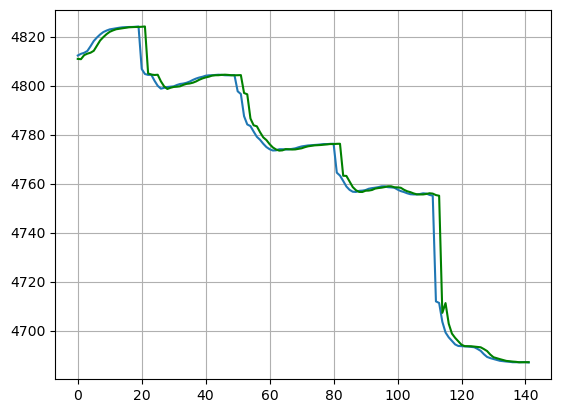

In [46]:
history = [x for x in train_data]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
 model = ARIMA(history, order=(1,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
plt.plot(test_data)
plt.plot(predictions, color='green')
plt.grid()
plt.show()


In [38]:
########################################